#### Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nasdaqdatalink
import yfinance as yf

##### Nasdaq API Key

In [2]:
nasdaq_key = 'yUkkodwj1uqL1EPc1kdS'
nasdaqdatalink.ApiConfig.api_key = nasdaq_key

##### Período analisado

In [3]:
start_date = '2013-01-31'
end_date = '2023-10-31'

##### Criação dos DataFrames dos Indicadores Macroeconômicos

In [4]:
selic = pd.DataFrame()
confianca = pd.DataFrame()
pib = pd.DataFrame()
incc = pd.DataFrame()
ipca = pd.DataFrame()
dolar = pd.DataFrame()

##### Obtenção dos dados e inclusão nos DataFrames

In [5]:
selic['SELIC'] = nasdaqdatalink.get('BCB/432', 
                                    start_date=start_date, 
                                    end_date=end_date, 
                                    collapse='daily')
confianca['CONFIANCA'] = nasdaqdatalink.get('BCB/4393', 
                                            start_date=start_date, 
                                            end_date=end_date, 
                                            collapse='daily')
pib['PIB'] = nasdaqdatalink.get('BCB/4380', 
                                start_date=start_date, 
                                end_date=end_date, 
                                collapse='daily')
incc['INCC'] = nasdaqdatalink.get('BCB/192', 
                                  start_date=start_date, 
                                  end_date=end_date, 
                                  collapse='daily')
ipca['IPCA'] = nasdaqdatalink.get('BCB/13522', 
                                  start_date=start_date, 
                                  end_date=end_date, 
                                  collapse='daily')
dolar['DOLAR'] = nasdaqdatalink.get('BCB/10813', 
                                    start_date=start_date, 
                                    end_date=end_date, 
                                    collapse='daily')

In [6]:
macros = pd.concat([selic, confianca, pib, incc, ipca, dolar], 
                   axis=1)
macros

,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
Date,,,,,,
2013-01-31,7.25,160.55,408889.7,0.65,6.15,1.9877
2013-02-01,7.25,NaN,NaN,NaN,NaN,1.9838
2013-02-02,7.25,NaN,NaN,NaN,NaN,NaN
2013-02-03,7.25,NaN,NaN,NaN,NaN,NaN
2013-02-04,7.25,NaN,NaN,NaN,NaN,1.9888
...,...,...,...,...,...,...
2023-09-21,12.75,NaN,NaN,NaN,NaN,4.9223
2023-09-22,12.75,NaN,NaN,NaN,NaN,4.9125
2023-09-23,12.75,NaN,NaN,NaN,NaN,NaN


In [7]:
macros.fillna(method='ffill', inplace=True)

##### Criando lista de FIIs

In [8]:
lista_acoes = ['^BVSP', 'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'MGLU3.SA', 'ABEV3.SA', 'ELET3.SA']
acoes = yf.download(lista_acoes, start=start_date, end=end_date)['Adj Close']
acoes

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,ELET3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,,,
2013-01-31,12.212334,4.087144,9.892135,0.338319,5.898510,21.906673,59761.00000
2013-02-01,12.147221,4.087144,9.844566,0.354107,6.022482,22.227707,60351.00000
2013-02-04,12.300501,4.006780,9.613950,0.354952,5.872410,22.010063,59576.00000
2013-02-05,12.226021,4.041222,9.856097,0.333808,5.898510,21.601965,59445.00000
2013-02-06,12.219234,4.006780,9.651424,0.323658,5.741912,21.846823,58951.00000
...,...,...,...,...,...,...,...
2023-09-20,13.470000,36.119999,27.620001,2.520000,34.290001,69.309998,118695.00000
2023-09-21,13.240000,34.950001,26.990000,2.350000,33.759998,67.500000,116145.00000
2023-09-22,13.120000,35.259998,26.920000,2.240000,34.029999,68.000000,116009.00000


In [9]:
acoes.fillna(method='ffill', inplace=True)

##### Criando DataFrame com os indicadores e os FIIs

In [10]:
comparativo_acoes = pd.merge(acoes, macros, how='inner', left_index=True, right_index=True)
comparativo_acoes

,ABEV3.SA,ELET3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA,^BVSP,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
Date,,,,,,,,,,,,,
2013-01-31,12.212334,4.087144,9.892135,0.338319,5.898510,21.906673,59761.0,7.25,160.55,408889.7,0.65,6.15,1.9877
2013-02-01,12.147221,4.087144,9.844566,0.354107,6.022482,22.227707,60351.0,7.25,160.55,408889.7,0.65,6.15,1.9838
2013-02-04,12.300501,4.006780,9.613950,0.354952,5.872410,22.010063,59576.0,7.25,160.55,408889.7,0.65,6.15,1.9888
2013-02-05,12.226021,4.041222,9.856097,0.333808,5.898510,21.601965,59445.0,7.25,160.55,408889.7,0.65,6.15,1.9875
2013-02-06,12.219234,4.006780,9.651424,0.323658,5.741912,21.846823,58951.0,7.25,160.55,408889.7,0.65,6.15,1.9878
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-19,13.430000,35.430000,27.160000,2.520000,34.209999,68.849998,117846.0,13.25,131.02,902863.8,0.17,4.61,4.8569
2023-09-20,13.470000,36.119999,27.620001,2.520000,34.290001,69.309998,118695.0,13.25,131.02,902863.8,0.17,4.61,4.8481
2023-09-21,13.240000,34.950001,26.990000,2.350000,33.759998,67.500000,116145.0,12.75,131.02,902863.8,0.17,4.61,4.9223


##### Criando a correlação e heatmap

In [11]:
corr_acoes = comparativo_acoes.corr()
corr_acoes

,ABEV3.SA,ELET3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA,^BVSP,SELIC,CONFIANCA,PIB,INCC,IPCA,DOLAR
ABEV3.SA,1.000000,0.265660,0.548260,0.024020,0.085776,0.120207,0.305756,-0.022044,-0.390172,0.224767,-0.135342,-0.144041,0.183149
ELET3.SA,0.265660,1.000000,0.801546,0.586574,0.783157,0.876990,0.945279,-0.235748,-0.042013,0.907484,0.151562,-0.022863,0.839952
ITUB4.SA,0.548260,0.801546,1.000000,0.544863,0.572804,0.636355,0.874518,-0.454523,-0.056557,0.676152,-0.061224,-0.409225,0.643903
MGLU3.SA,0.024020,0.586574,0.544863,1.000000,0.194989,0.579152,0.697237,-0.772408,-0.069572,0.413050,0.315711,-0.239687,0.694400
PETR4.SA,0.085776,0.783157,0.572804,0.194989,1.000000,0.777740,0.753315,0.098826,0.205335,0.885728,-0.009188,-0.023176,0.592654
VALE3.SA,0.120207,0.876990,0.636355,0.579152,0.777740,1.000000,0.895257,-0.236867,0.077850,0.900767,0.227169,0.073688,0.804350
^BVSP,0.305756,0.945279,0.874518,0.697237,0.753315,0.895257,1.000000,-0.434920,0.038885,0.860239,0.134073,-0.174536,0.815396
SELIC,-0.022044,-0.235748,-0.454523,-0.772408,0.098826,-0.236867,-0.434920,1.000000,-0.228460,-0.013306,-0.152714,0.558530,-0.276573
CONFIANCA,-0.390172,-0.042013,-0.056557,-0.069572,0.205335,0.077850,0.038885,-0.228460,1.000000,-0.065170,-0.080252,-0.287384,-0.280696
PIB,0.224767,0.907484,0.676152,0.413050,0.885728,0.900767,0.860239,-0.013306,-0.065170,1.000000,0.085389,0.068009,0.840580


<Axes: >

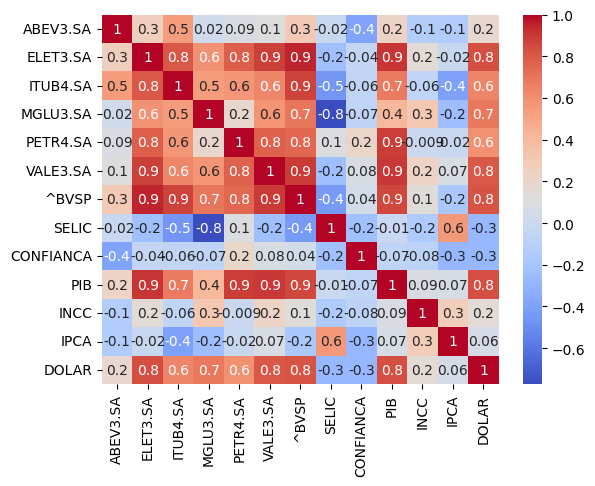

In [12]:
tabela_acoes = corr_acoes.columns

sns.heatmap(corr_acoes, cmap='coolwarm',
            annot=True, fmt='.1g',
            xticklabels=tabela_acoes,
            yticklabels=tabela_acoes)

##### Plotando gráficos

In [93]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='HGLG11.SA', x=comparativo_acoes.index, 
                         y=comparativo_acoes['HGLG11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='PIB', x=comparativo_acoes.index, 
                         y=comparativo_acoes['PIB']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'HGLG11 vs PIB', 
                  template='simple_white')
fig.show()

In [94]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='BRCR11.SA', x=comparativo_acoes.index, 
                         y=comparativo_acoes['BRCR11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='PIB', x=comparativo_acoes.index, 
                         y=comparativo_acoes['PIB']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'BRCR11 vs PIB', 
                  template='simple_white')
fig.show()

In [95]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='KNCR11.SA', x=comparativo_acoes.index, 
                         y=comparativo_acoes['KNCR11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='SELIC', x=comparativo_acoes.index, 
                         y=comparativo_acoes['SELIC']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'KNCR11 vs SELIC', 
                  template='simple_white')
fig.show()

In [96]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='MXRF11.SA', x=comparativo_acoes.index, 
                         y=comparativo_acoes['MXRF11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='HGLG11.SA', x=comparativo_acoes.index, 
                         y=comparativo_acoes['HGLG11.SA']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'MXRF11 vs HGLG11', 
                  template='simple_white')
fig.show()

In [97]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Scatter(name='MXRF11.SA', x=comparativo_acoes.index, 
                         y=comparativo_acoes['MXRF11.SA']), row=1, col=1)
fig.add_trace(go.Scatter(name='BCFF11.SA', x=comparativo_acoes.index, 
                         y=comparativo_acoes['BCFF11.SA']), row=1, col=1, 
              secondary_y=True)

fig.update_layout(title_text= 'MXRF11 vs BCFF11', 
                  template='simple_white')
fig.show()